# IMPORT LIBRARIES

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# IMPORT DATASET

In [49]:
file_path = 'C:\\Users\\Nithya\\Desktop\\Major project\\Dataset\\diabetes_012_health_indicators_BRFSS2015.csv'
df = pd.read_csv(file_path)

# DOWNSAMPLING

In [50]:
target_variable = 'Diabetes_012'
class_0 = df[df[target_variable] == 0]
class_1 = df[df[target_variable] == 1]
class_2 = df[df[target_variable] == 2]
downsampled_size = 4631
class_0_downsampled = class_0.sample(n=downsampled_size, random_state=42)
class_1_downsampled = class_1.sample(n=downsampled_size, random_state=42)
class_2_downsampled = class_2.sample(n=downsampled_size, random_state=42)
f_downsampled = pd.concat([class_0_downsampled, class_1_downsampled, class_2_downsampled])
print(f_downsampled)

        Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
162288           0.0     0.0       0.0        1.0  24.0     0.0     0.0   
227646           0.0     1.0       0.0        1.0  32.0     1.0     0.0   
888              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
230094           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
134829           0.0     0.0       0.0        1.0  35.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
66672            2.0     1.0       1.0        1.0  35.0     1.0     0.0   
42017            2.0     1.0       1.0        1.0  32.0     1.0     1.0   
67332            2.0     0.0       0.0        1.0  26.0     1.0     0.0   
251948           2.0     0.0       1.0        1.0  26.0     0.0     0.0   
171966           2.0     1.0       0.0        1.0  29.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
162288                   

# DOWNSAMPLED COUNT

In [51]:
print("Class Distribution in Downsampled Data:")
print(f_downsampled[target_variable].value_counts())
print("Unique Classes in Downsampled Data:", f_downsampled[target_variable].unique())
print("Class Distribution in Downsampled Data:", f_downsampled[target_variable].value_counts())

Class Distribution in Downsampled Data:
Diabetes_012
0.0    4631
1.0    4631
2.0    4631
Name: count, dtype: int64
Unique Classes in Downsampled Data: [0. 1. 2.]
Class Distribution in Downsampled Data: Diabetes_012
0.0    4631
1.0    4631
2.0    4631
Name: count, dtype: int64


# DATA SPLIT

In [52]:
X = f_downsampled.drop(target_variable, axis=1)  
y = f_downsampled[target_variable] 
test_size = 0.2  
train_size = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, train_size=train_size , stratify=y)


# KNN

In [53]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy * 100, "%")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 43.64879453040662 %
Confusion Matrix:
 [[564 202 160]
 [350 309 268]
 [246 340 340]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.49      0.61      0.54       926
         1.0       0.36      0.33      0.35       927
         2.0       0.44      0.37      0.40       926

    accuracy                           0.44      2779
   macro avg       0.43      0.44      0.43      2779
weighted avg       0.43      0.44      0.43      2779



# DATA VISUALIZATION

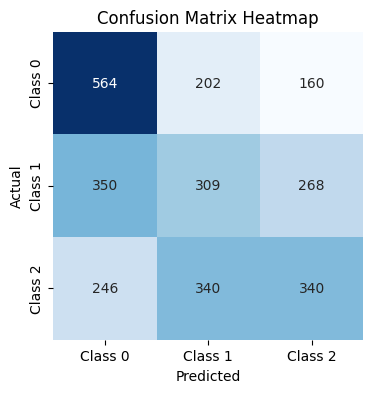

In [54]:
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Class 0", "Class 1", "Class 2"],
            yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# FEATURE RANKING

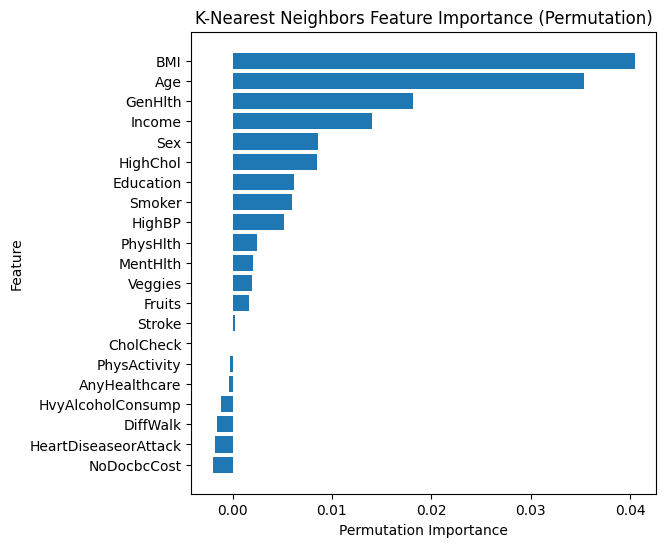

In [55]:
feature_names = X.columns.tolist()

# Remove feature names before fitting the KNeighborsClassifier model
X_no_names = X.values

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_no_names, y, test_size=0.2, random_state=42)

# Train a k-nearest neighbors model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Perform permutation feature importance
result = permutation_importance(knn_model, X_test, y_test, n_repeats=10, random_state=42)

# Get sorted indices based on importance scores
sorted_idx = result.importances_mean.argsort()

# Map indices to feature names
sorted_feature_names = [feature_names[i] for i in sorted_idx]

# Plot the feature importance with feature names
plt.figure(figsize=(6, 6))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx])
plt.yticks(range(len(sorted_idx)), sorted_feature_names)
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('K-Nearest Neighbors Feature Importance (Permutation)')
plt.show()